# Install your libraries


# Load your libraries

In [ ]:
library(tximport)
library(DESeq2)
library(plotly)
library(biomaRt)
library(pheatmap)
library(RColorBrewer)
library(org.Hs.eg.db)
library(tidyverse)
library(EnhancedVolcano)
library(ggrepel)

# Import your data and perform dimensional analysis + formatting
Edit the first three lines to reflect the sample(s) you're working with.

In [ ]:
sample_run = 'Six'
species = 'human'
conditions = c('control', 'control', sample_run, sample_run)







SraRunTable = paste0('SraRunTable', sample_run,'.txt')
sample_table = read_csv(SraRunTable) %>% dplyr::select(`sample name`,
                                                treatment, cell_line)
sample_files = paste0(
  pull(sample_table, `sample name`),
  '/quant.sf')
names(sample_files) = pull(sample_table, `sample name`)
if (species=='mouse'){
    gene_map = read.csv("gene_map.csv", col.names = c('ensmust', 'ensmusg'))
    }
if (species=='human'){
    gene_map = read.csv("gene_map.csv", col.names = c('enstid', 'ensgid'))
    }
count_data = tximport(files = sample_files,
                      type = "salmon",
                      tx2gene = gene_map,
                      ignoreTxVersion = TRUE)
sample_table = as.data.frame(sample_table)
#Create and check deseq_dataset
colnames(sample_table)[1] = 'Sample'
conditions = factor(conditions)
sample_table$conditions = conditions
deseq_dataset = DESeqDataSetFromTximport(txi=count_data,
                                         colData=sample_table,
                                         design=~conditions)
counts(deseq_dataset)
colData(deseq_dataset)

#Perform dimensional analysis and statistics
deseq_dataset=estimateSizeFactors(deseq_dataset)
deseq_dataset = estimateDispersions(deseq_dataset)
#view(deseq_dataset)
deseq_dataset = nbinomWaldTest(deseq_dataset)
result_table = results(deseq_dataset)
#Reformat results to make them more workable
result_df = as.data.frame(result_table)
filter_df1 = result_df[complete.cases(result_df),]
if (species=='mouse'){
    filter_df1 = rownames_to_column(filter_df1, var='ensmusg')
     }
if (species=='human'){
    filter_df1 = rownames_to_column(filter_df1, var='ensgene')
     }
#Make gene names human readable
ensembl107 = useEnsembl(biomart="ensembl", version=107)

if (species=='mouse'){
ensembl107 = useDataset("mmusculus_gene_ensembl",
                        mart=ensembl107)
annotation = getBM(attributes=c('ensembl_gene_id',
                                'chromosome_name',
                                'start_position',
                                'end_position',
                                'strand',
                                'gene_biotype',
                                'external_gene_name',
                                'description'),
                   filters = c('ensembl_gene_id'),
                   values = filter_df1$ensmusg,
                   mart = ensembl107)
annotated_df = left_join(filter_df1, annotation,
                         by=c('ensmusg'='ensembl_gene_id'))
    }
if (species=='human'){
ensembl107 = useDataset("hsapiens_gene_ensembl",
                        mart=ensembl107)
annotation = getBM(attributes=c('ensembl_gene_id',
                                'chromosome_name',
                                'start_position',
                                'end_position',
                                'strand',
                                'gene_biotype',
                                'external_gene_name',
                                'description'),
                   filters = c('ensembl_gene_id'),
                   values = filter_df1$ensgene,
                   mart = ensembl107)
annotated_df = left_join(filter_df1, annotation,
                         by=c('ensgene'='ensembl_gene_id'))
    }


Rows: 4 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sample name, treatment, cell_line

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
reading in files with read_tsv

1 
2 
3 
4 


removing duplicated transcript rows from tx2gene

transcripts missing from tx2gene: 434

summarizing abundance

summarizing counts

summarizing length

using counts and average transcript lengths from tximport



,controlA,controlB,sixA,sixB
ENSG00000000003,1079,1073,960,1270
ENSG00000000005,0,0,0,0
ENSG00000000419,802,953,930,1098
ENSG00000000457,103,81,72,116
ENSG00000000460,589,471,478,640
ENSG00000000938,0,0,0,0
ENSG00000000971,32,32,22,79
ENSG00000001036,12139,7418,7228,11132
ENSG00000001084,115,84,49,102
ENSG00000001167,139,88,73,161


DataFrame with 4 rows and 4 columns
              Sample   treatment   cell_line conditions
         <character> <character> <character>   <factor>
controlA    controlA     control    EA.hy926    control
controlB    controlB     control    EA.hy926    control
sixA            sixA   treatment    EA.hy926    Six    
sixB            sixB   treatment    EA.hy926    Six    

using 'avgTxLength' from assays(dds), correcting for library size

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



# Generate Volcano plot (single sample only)
See if it works for fun! Not technically part of the assignment, but it should work if you've done things correctly.

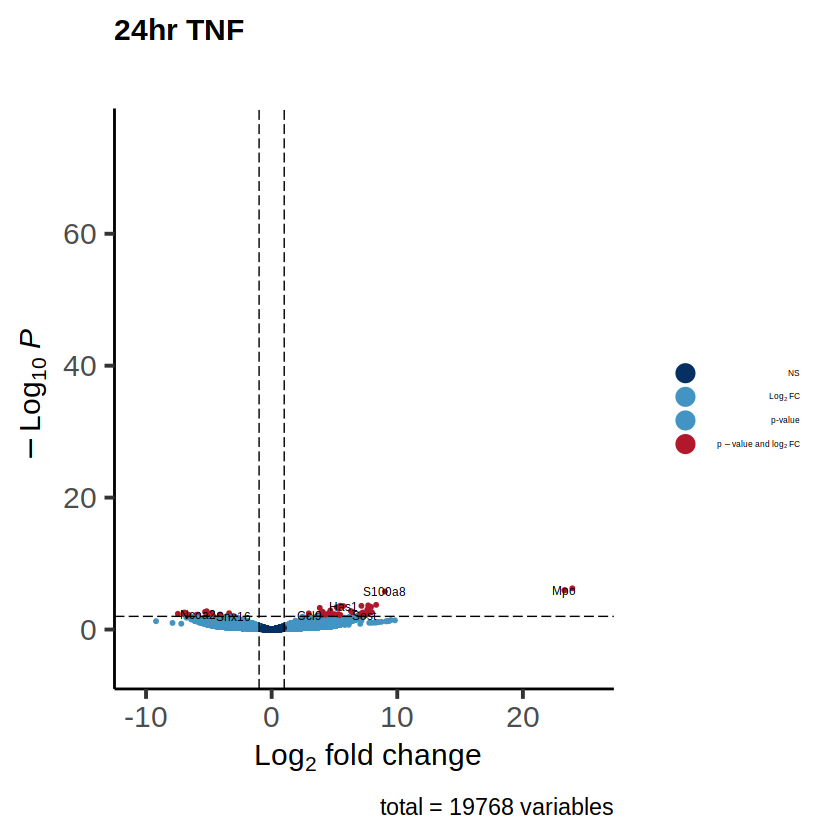

In [ ]:
EnhancedVolcano(annotated_df, lab = annotated_df$external_gene_name, x='log2FoldChange',
                y='pvalue', labSize = 2.5, pCutoff = 0.01,
                legendPosition = 'right', drawConnectors = FALSE, subtitle = '', col = c('#053061', '#4393C3', '#4393C3', '#B2182B'),
                widthConnectors = 1, labCol = 'black',gridlines.major = FALSE, pointSize = 1, colAlpha = 1,
                gridlines.minor = FALSE, colConnectors = 'red', ylim = c(-5, 75), legendLabSize = 5, title = '24hr TNF')


# Generate heatmap
Edit the pheatmap command to reformat your heatmap.

,controlA,controlB,tfourA,tfourB
ENSG00000008517,6.377462,6.687491,10.869747,11.714653
ENSG00000048052,7.261266,7.399862,8.562828,8.714426
ENSG00000050730,6.459210,6.329949,8.178053,8.586511
ENSG00000056558,6.752152,6.887556,10.757047,10.575043
ENSG00000081041,6.617993,6.355092,8.011099,7.933117
ENSG00000090339,7.814098,8.017925,12.463841,12.465487


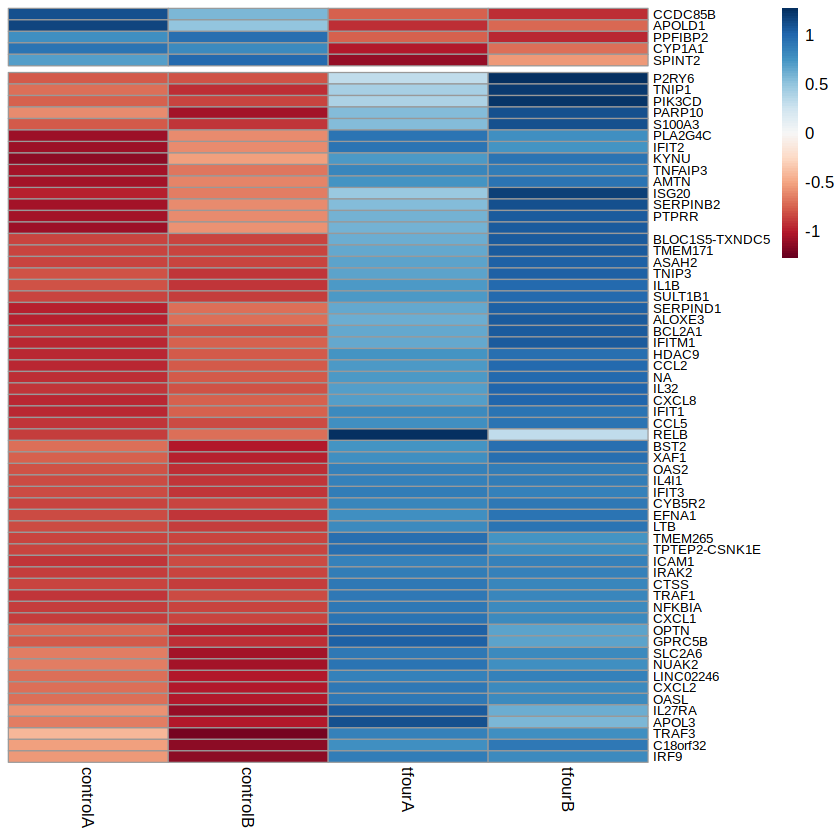

In [ ]:
#filter based on p value and lfc cutoffs
anno_df2 = annotated_df[annotated_df$padj < .05,]
anno_df3 = anno_df2 [abs(anno_df2$log2FoldChange) > 1.5,]

#specify gene names
if (species=='mouse'){
degs = anno_df3$ensmusg
    }
if (species=='human'){
degs = anno_df3$ensgene
    }
#reformat data for heatmap
vst_1 = varianceStabilizingTransformation(deseq_dataset)
vst_mat = assay(vst_1)
data_for_hm = vst_mat[degs,]
#make a color palette
yb = colorRampPalette(brewer.pal(n = 11, name = "RdBu"))(100)

#head(data_for_hm)
#view(data_for_hm)
#yb = colorRampPalette(c('darkslategray4', 'paleturquoise3', 'white', 'darksalmon', 'darkred'))(100)
#view(brewer.pal(n = 11, name = "RdBu"))

rownames(data_for_hm) = anno_df3$external_gene_name
pheatmap(data_for_hm, color=yb, fontsize_row=8, scale='row', cutree_rows = 2, cutree_cols = 2,
         cluster_cols =FALSE, treeheight_col = 0, treeheight_row = 0)